In [1]:
# in case imports fail
! pip install gplearn

     |████████████████████████████████| 51kB 2.2MB/s 


In [0]:
import matplotlib.pyplot as plt
import math
import numpy as np
import gplearn as gp
from gplearn.genetic import SymbolicRegressor
import graphviz

In [0]:
# genrate inputs
dependent_var = [x/10 for x in range(-10, 11, 1)]

# target values
Y = [0.0000,
    -0.1629,
    -0.2624,
    -0.3129,
    -0.3264,
    -0.3125,
    -0.2784,
    -0.2289,
    -0.1664,
    -0.0909,
    0.0,
    0.1111,
    0.2496,
    0.4251,
    0.6496,
    0.9375,
    1.3056,
    1.7731,
    2.3616,
    3.0951,
    4.0000]

Text(0, 0.5, 'Output')

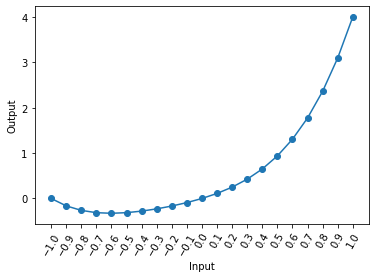

In [45]:
# plot original function
plt.figure()
plt.scatter(dependent_var, Y)
plt.plot(dependent_var, Y)
plt.xticks(ticks=dependent_var, rotation = 60)
plt.xlabel('Input')
plt.ylabel('Output')

In [0]:
# custom exp() function as gplearn does not provide one 
def exp_func(x):
    with np.errstate(over='ignore'):
      return np.where(np.abs(x) < 100, np.exp(x), 0.)

In [0]:
# custom function to calculate the negative sum of absolute errors
def sum_ab_e(y, y_pred, w):
    return -np.sum(np.abs(np.subtract(y, y_pred)))

In [0]:
# initialise algorithmn and hyprerparameters
# random state for reproducability
# parsimony controls bloat

exp = gp.functions.make_function(exp_func, 'exp', 1)
sum_ab = gp.fitness.make_fitness(sum_ab_e, greater_is_better=True)

est_gp = SymbolicRegressor(population_size=1000,
                           init_method = 'half and half',
                           generations=50, 
                           stopping_criteria=0.00,
                           p_crossover=0.7, 
                           p_subtree_mutation=0.0,
                           p_hoist_mutation=0.0, 
                           p_point_mutation=0.0,
                           function_set = ('add', 'sub', 'div', 'mul', 'log', 'cos', 'sin', exp),
                           metric = sum_ab,
                           verbose=1,
                           parsimony_coefficient=0.01, 
                           random_state=0)

In [86]:
# fit model
reg = est_gp.fit(np.array(dependent_var).reshape(-1, 1), np.array(Y))

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    15.98     -4.03552e+20       11         -7.22823              N/A     39.73s
   1    12.52         -76.7605       13         -4.12617              N/A     30.15s
   2    12.63     -2.53867e+22       17         -3.96273              N/A     30.14s
   3    11.71     -1.57659e+09       15         -3.57492              N/A     30.29s
   4    13.74     -2.27807e+09       16         -3.29565              N/A     30.60s
   5    16.69     -7.45321e+08       16         -3.29565              N/A     31.01s
   6    16.55     -5.37445e+08       16         -3.14993              N/A     33.75s
   7    15.55     -4.16726e+08       16         -3.14993              N/A     30.58s
   8    15.10     -1.04643e+08       16         -3.14993              N/A  

In [87]:
# print the found symbolic expression
print(reg._program)

mul(sin(add(sin(add(add(X0, sin(add(X0, 0.425))), sin(add(X0, 0.425)))), X0)), mul(add(X0, 0.425), mul(exp(X0), add(X0, 0.122))))


In [0]:
# Use learned function to calculate values
def learned_func(x):
  return reg.predict(np.array(x).reshape(-1,1))

Text(0, 0.5, 'Output')

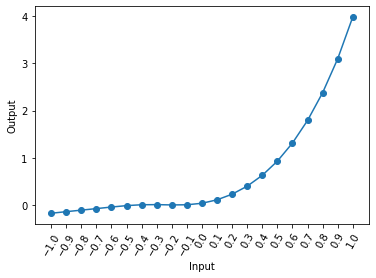

In [89]:
# visualise function output
plt.figure()
plt.scatter(dependent_var, learned_func(dependent_var))
plt.plot(dependent_var,  learned_func(dependent_var))
plt.xticks(ticks=dependent_var, rotation = 60)
plt.xlabel('Input')
plt.ylabel('Output')

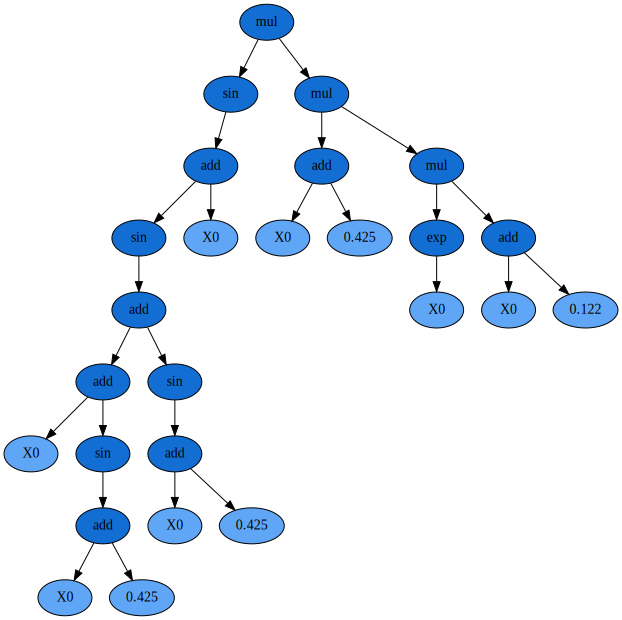

In [90]:
# visualise symbolic expression
dot_data = reg._program.export_graphviz()
graph = graphviz.Source(dot_data)
#graph.render('images/ex1_child', format='png', cleanup=True)
graph

In [0]:
# retrieve generations, length and fitness of best per generation
info = reg.run_details_
best_length = info.get('best_length')
best_fitness = info.get('best_fitness')
gens = info.get('generation')

Text(0, 0.5, 'Best of generation fitness')

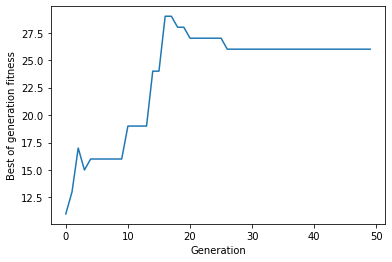

In [92]:
# visualise best fitness per generation
plt.figure()
plt.plot(gens,  best_length)
plt.xlabel('Generation')
plt.ylabel('Best of generation fitness')

Text(0, 0.5, 'Best of generation fitness')

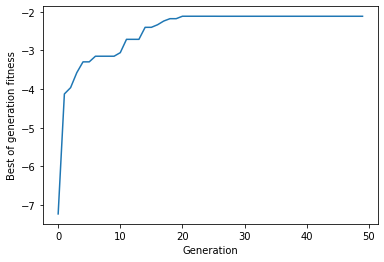

In [93]:
# visualise best length per generation
plt.figure()
plt.plot(gens, best_fitness)
plt.xlabel('Generation')
plt.ylabel('Best of generation fitness')